In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [120]:
df=pd.read_csv('election2024.csv')
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [26]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [121]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [6]:
df['candidate'].unique()

array(['Putin', 'Davankov', 'will not take part', 'spoilt vote',
       'Kharitonov', 'struggle to answer', 'Slutskiy'], dtype=object)

In [7]:
df['federal_district'].unique()

array(['north caucasian', 'volga', 'northwestern', 'southern', 'central',
       'ural', 'siberian', 'far eastern'], dtype=object)

In [8]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [9]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [10]:
df.will_vote.unique()

array(['not sure', 'definitely yes', 'likely no', 'definitely no',
       'likely yes', 'struggle to answer'], dtype=object)

In [11]:
df.isnull().sum().sort_values(ascending=False)

job_type               908
company_type           721
id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
weight1                  0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [122]:
df.drop('id',axis=1,inplace=True)

In [123]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [124]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
num_cols=[col for col in df.columns if df[col].dtype!='object']

In [125]:
cat_cols

['sex',
 'federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment',
 'job_type',
 'company_type']

In [126]:
num_cols

['age', 'weight1']

In [127]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}values\n")

sex has ['male' 'female']values

federal_district has ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']values

type_of_city has ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']values

knows_election_date has ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']values

will_vote has ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer']values

candidate has ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy']values

television_usage has ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month']values

internet_usage has ['over 4 hours a day' 'less than 4 hours a day' 'several times a we

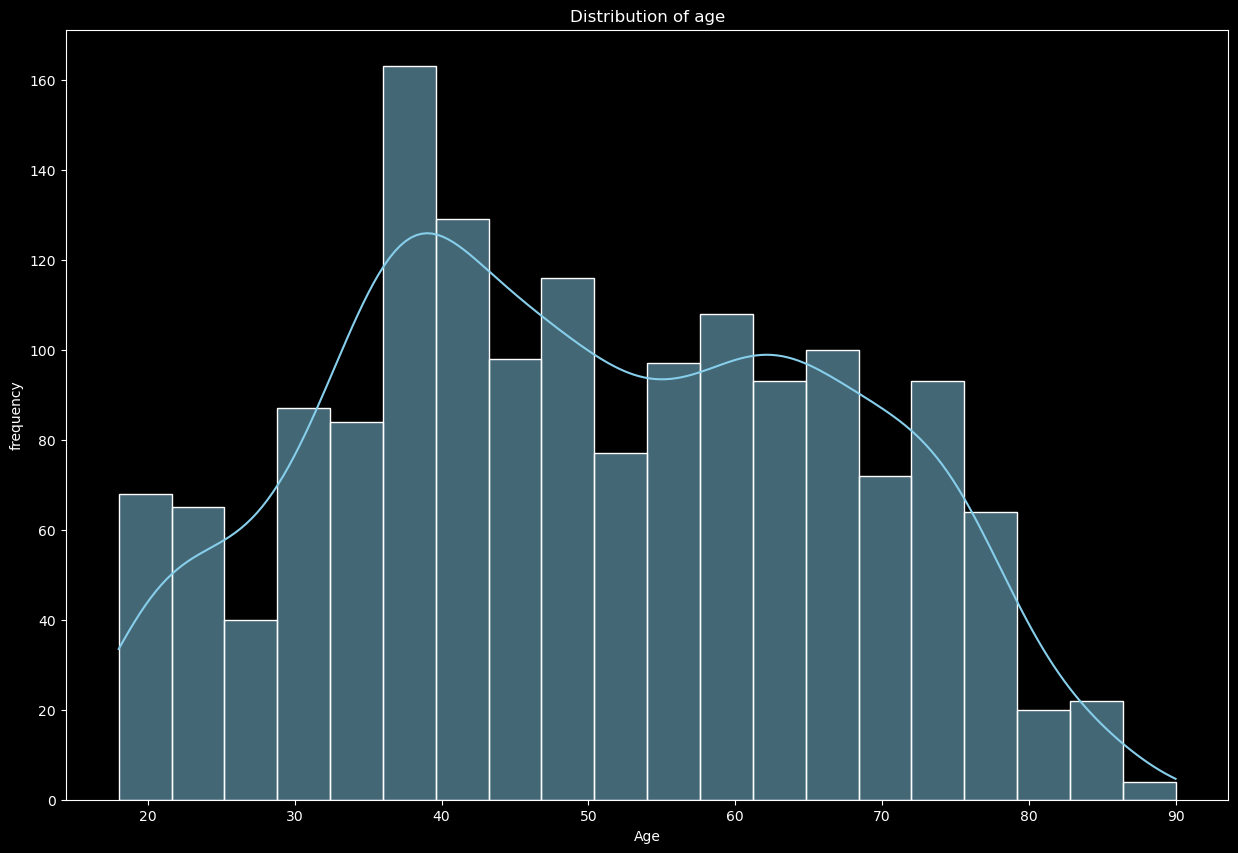

In [38]:
#Univariated 
plt.figure(figsize=(15,10))
sns.histplot(df["age"].dropna(),kde=True,bins=20,color="skyblue")
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

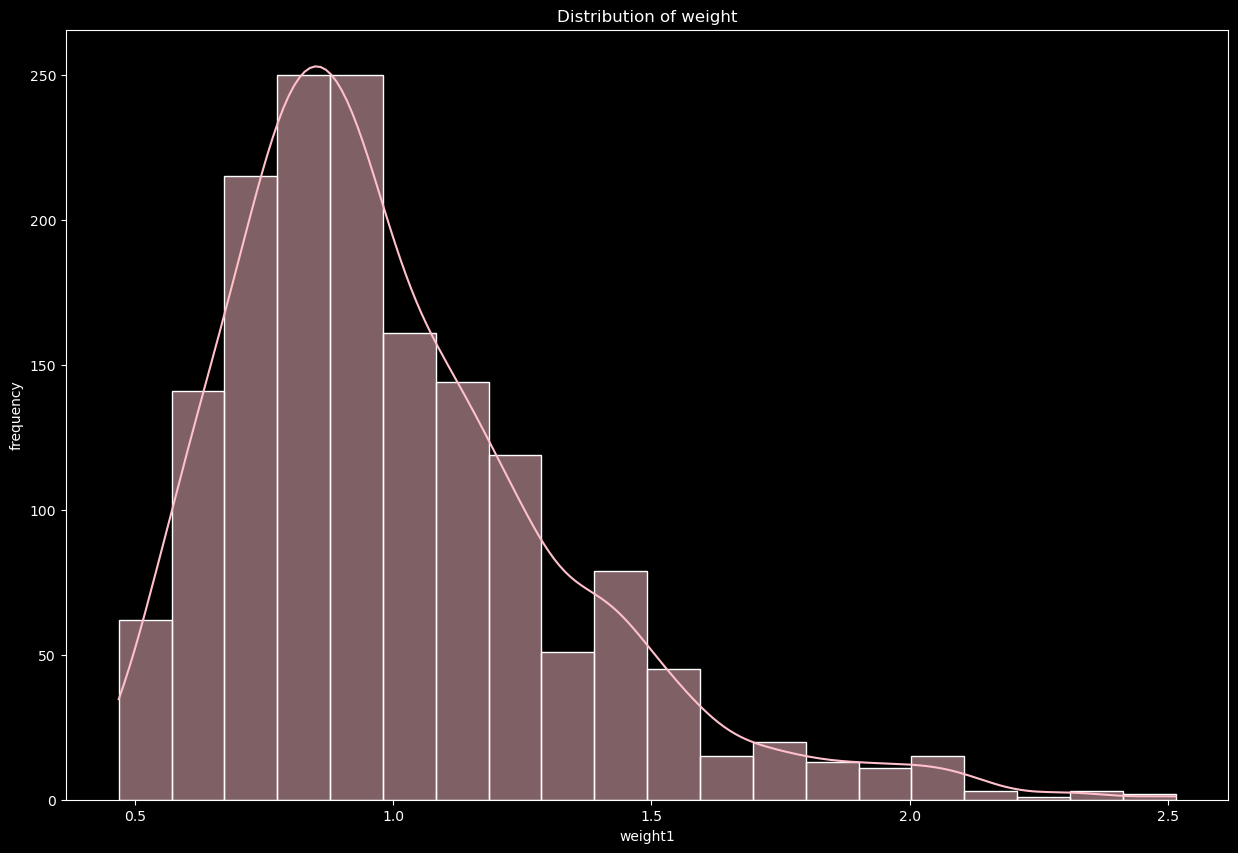

In [39]:
#Univariated 
plt.figure(figsize=(15,10))
sns.histplot(df["weight1"].dropna(),kde=True,bins=20,color="pink")
plt.title("Distribution of weight")
plt.xlabel("weight1")
plt.ylabel("frequency")
plt.show()

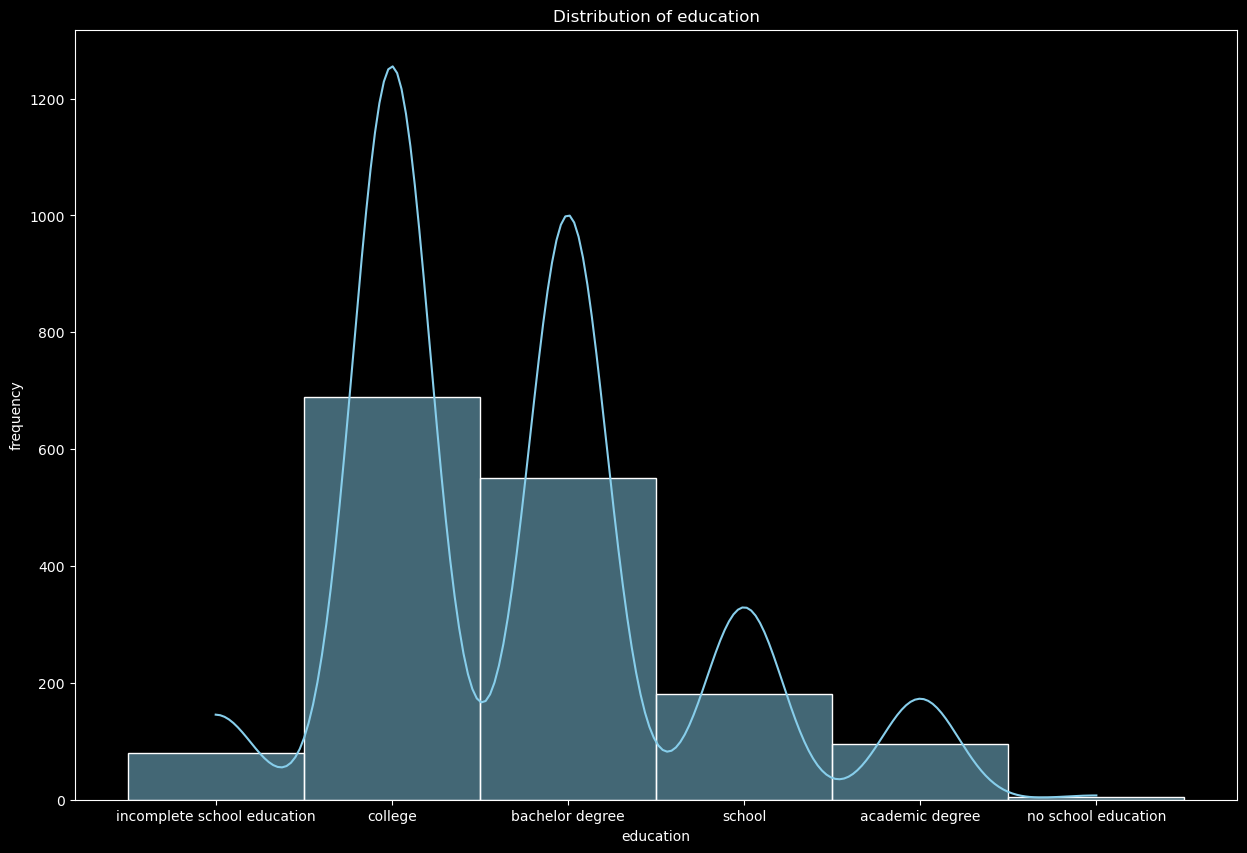

In [41]:
#Univariated 
plt.figure(figsize=(15,10))
sns.histplot(df["education"].dropna(),kde=True,bins=20,color="skyblue")
plt.title("Distribution of education")
plt.xlabel("education")
plt.ylabel("frequency")
plt.show()

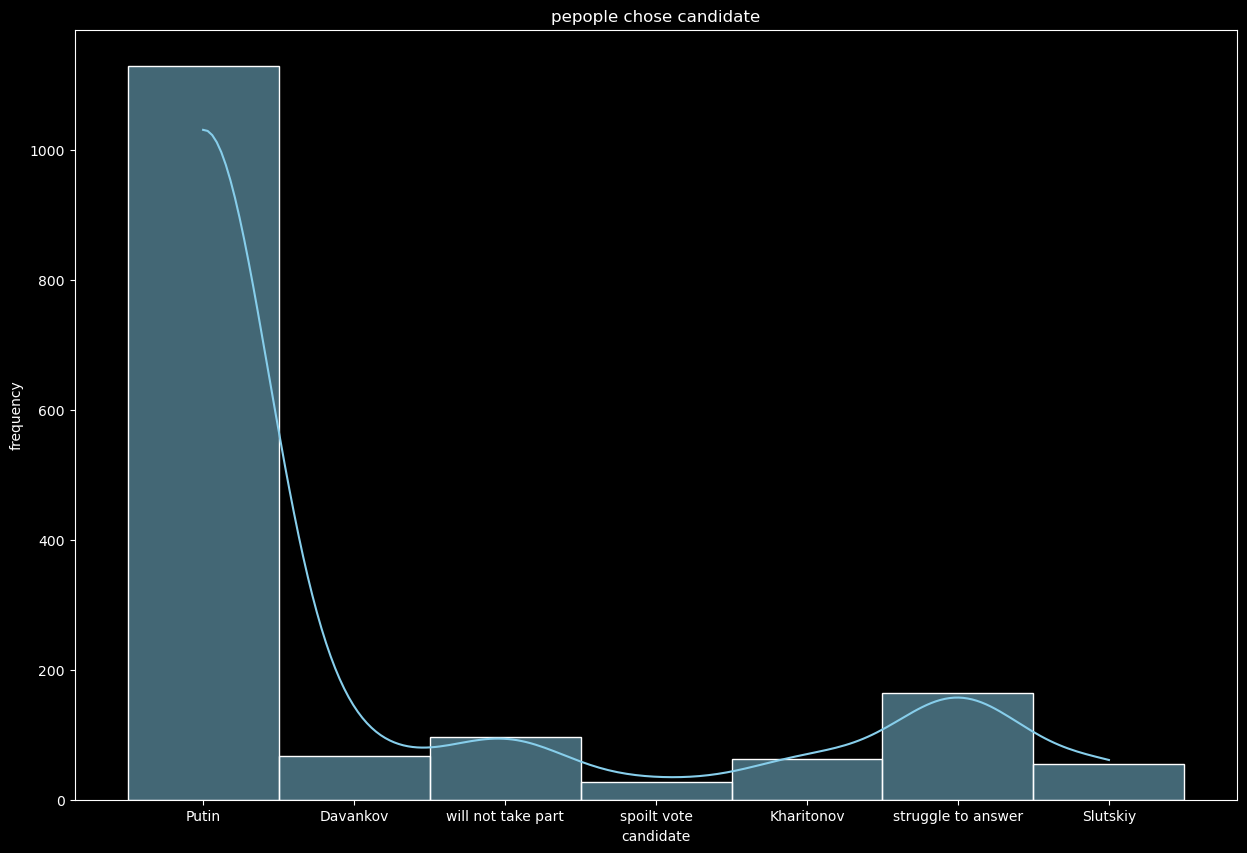

In [43]:
plt.figure(figsize=(15,10))
sns.histplot(df["candidate"].dropna(),kde=True,bins=20,color="skyblue")
plt.title("pepople chose candidate")
plt.xlabel("candidate")
plt.ylabel("frequency")
plt.show()

<Axes: xlabel='candidate', ylabel='count'>

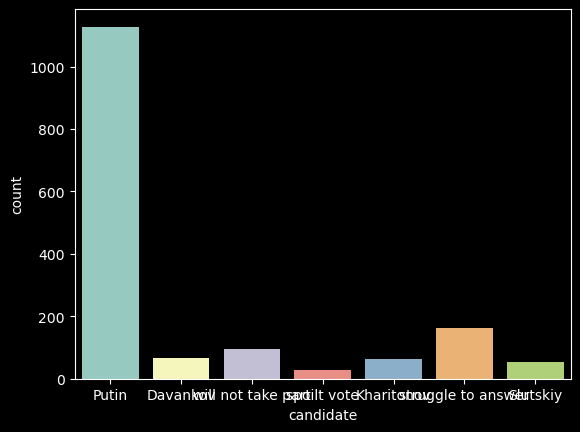

In [45]:
sns.countplot(x='candidate',data=df)

<Axes: xlabel='sex', ylabel='count'>

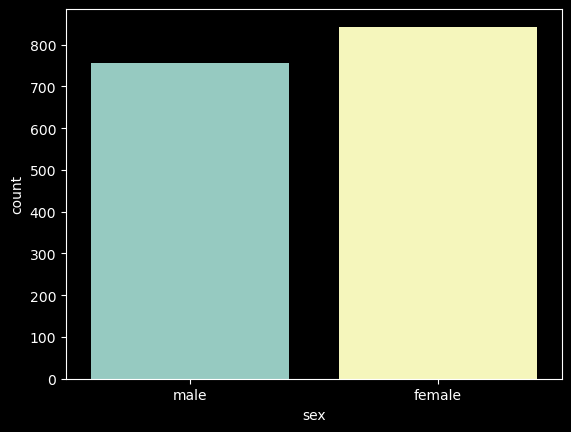

In [46]:
sns.countplot(x='sex',data=df)

In [ ]:
#it maen female poplation is more acitve to giving vote

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'over 4 hours a day'),
  Text(1, 0, 'less than 4 hours a day'),
  Text(2, 0, 'several times a week'),
  Text(3, 0, 'does not use internet'),
  Text(4, 0, 'several times a month'),
  Text(5, 0, 'once half a year')])

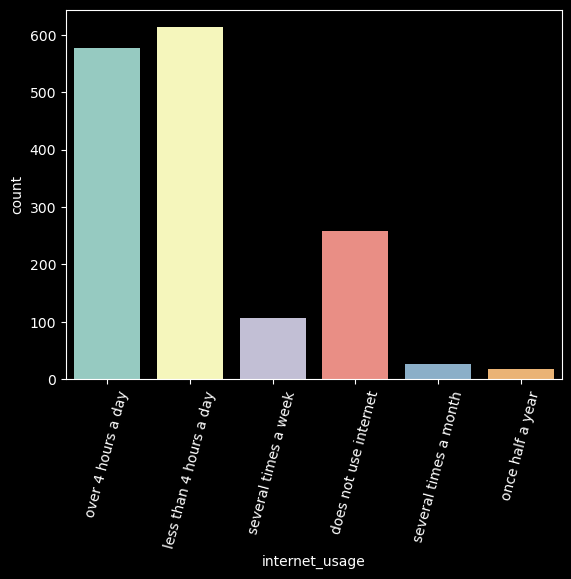

In [55]:
sns.countplot(x='internet_usage',data=df)
# Rotate the x-axis labels
plt.xticks(rotation=75)

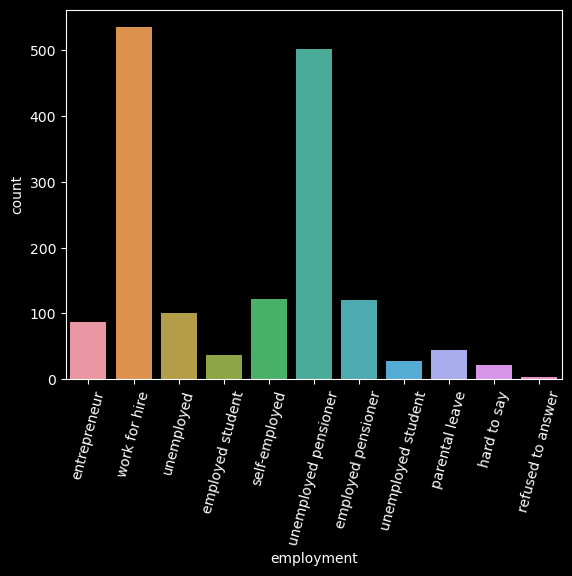

In [54]:
sns.countplot(x='employment',data=df)
# Rotate the x-axis labels
plt.xticks(rotation=75)
plt.show()

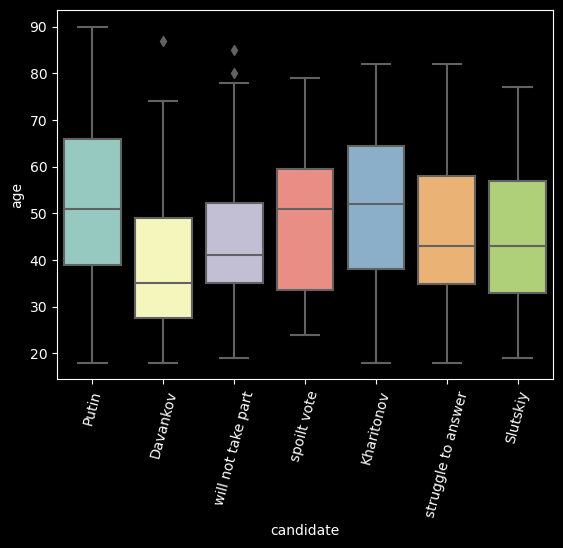

In [62]:
sns.boxplot(x='candidate',y='age',data=df)
plt.xticks(rotation=75)
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             692 non-null    object 
 13  company_type         879 non-null    object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), object(13)
memory usage

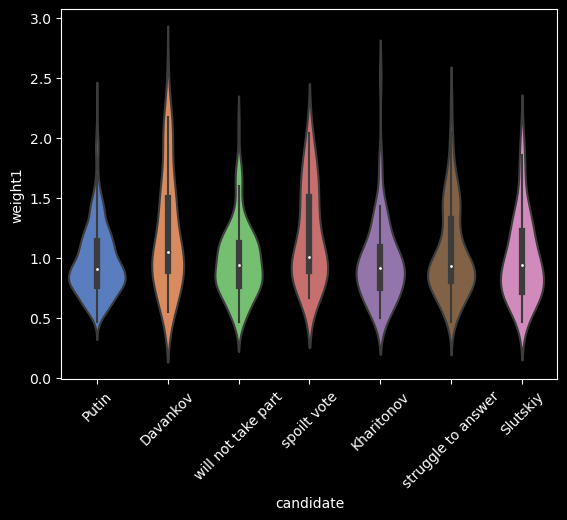

In [65]:
sns.violinplot(x="candidate",y="weight1",data=df,palette="muted")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='candidate', ylabel='count'>

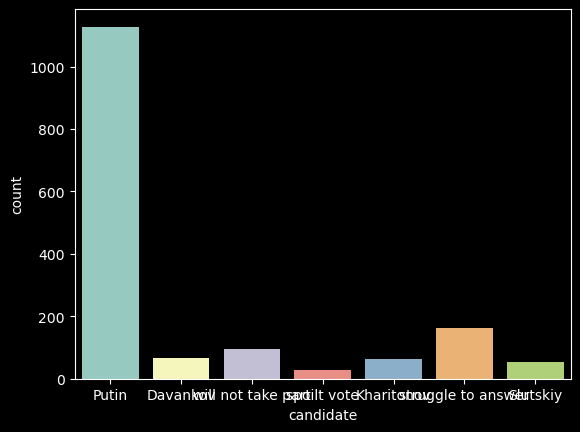

In [66]:
sns.countplot(x='candidate',data=df)

<Axes: ylabel='count'>

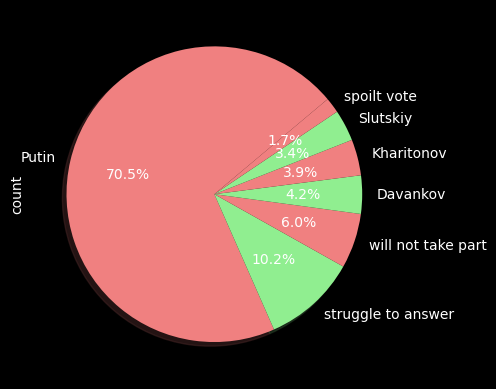

In [69]:
df.candidate.value_counts().plot.pie(autopct="%1.1f%%",colors=["lightcoral","lightgreen"],startangle=40,shadow=True)

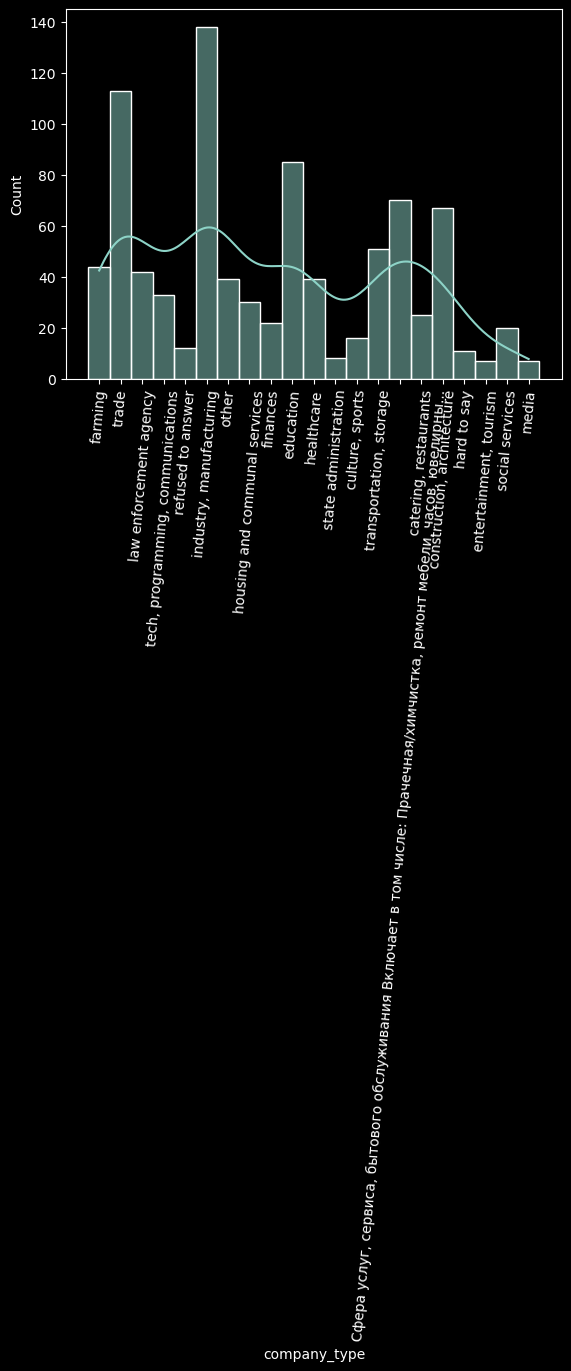

In [72]:
sns.histplot(df["company_type"].dropna(),bins=20,kde=True)
plt.xticks(rotation=85)
plt.show()

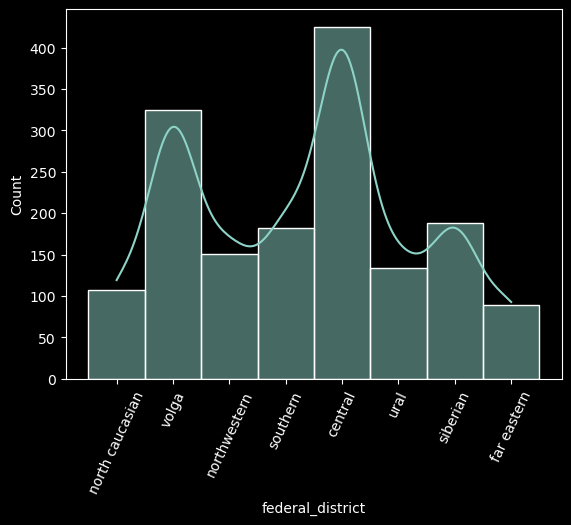

In [74]:
sns.histplot(df["federal_district"],bins=20,kde=True)
plt.xticks(rotation=65)
plt.show()

<Axes: ylabel='count'>

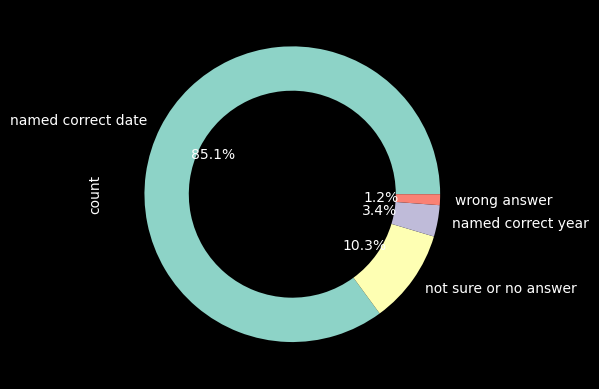

In [75]:
df["knows_election_date"].value_counts().plot.pie(autopct="%1.1f%%",wedgeprops=dict(width=0.3))

<Axes: ylabel='count'>

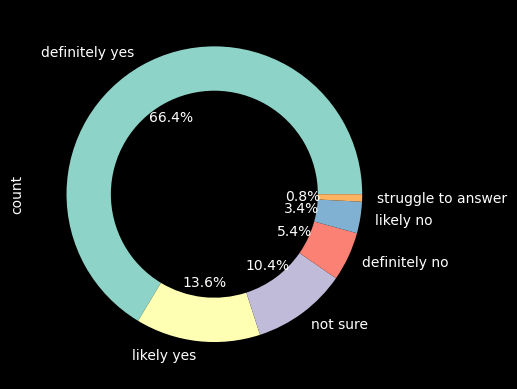

In [76]:
df["will_vote"].value_counts().plot.pie(autopct="%1.1f%%",wedgeprops=dict(width=0.3))

<Axes: ylabel='count'>

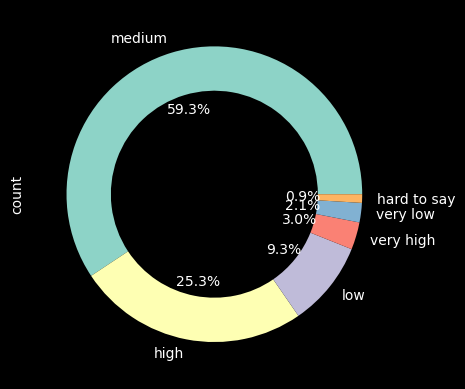

In [77]:
df["income"].value_counts().plot.pie(autopct="%1.1f%%",wedgeprops=dict(width=0.3))

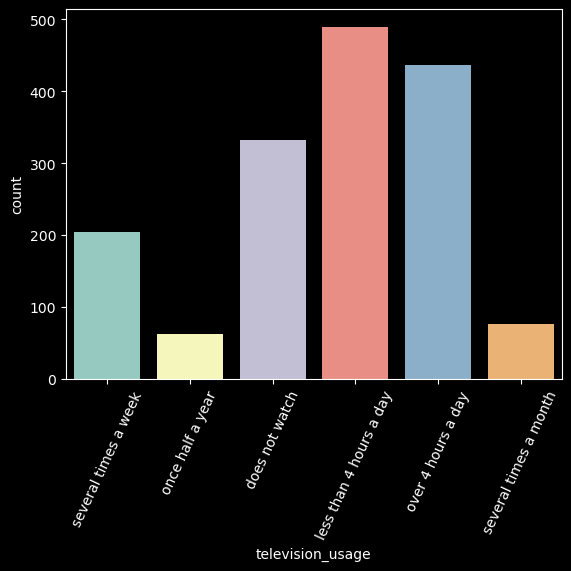

In [80]:
sns.countplot(x="television_usage",data=df)
plt.xticks(rotation=65)
plt.show()

<Axes: xlabel='age', ylabel='will_vote'>

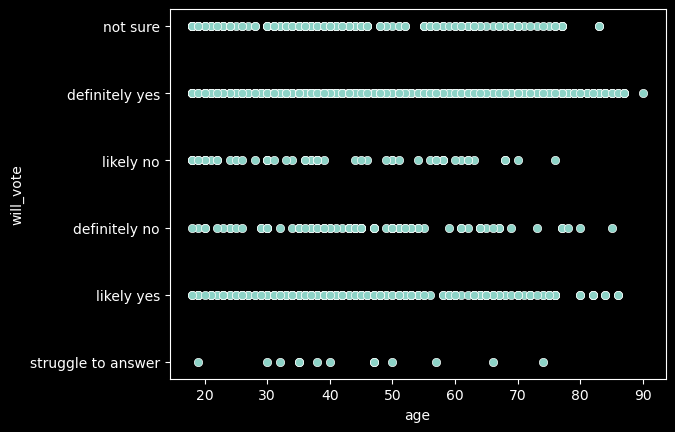

In [81]:
#bivariate analysis
sns.scatterplot(x="age",y="will_vote",data=df)   #This plot is howing which age give how many vote

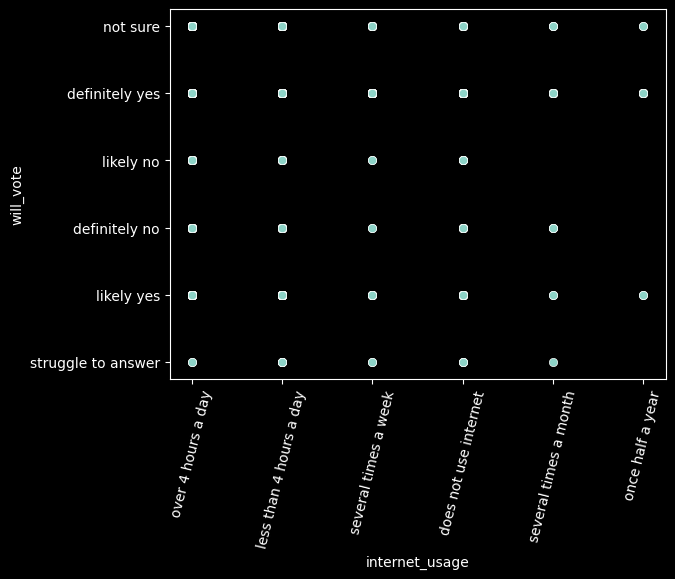

In [84]:
sns.scatterplot(x="internet_usage",y="will_vote",data=df)
plt.xticks(rotation=76)
plt.show()

<Axes: xlabel='sex', ylabel='employment'>

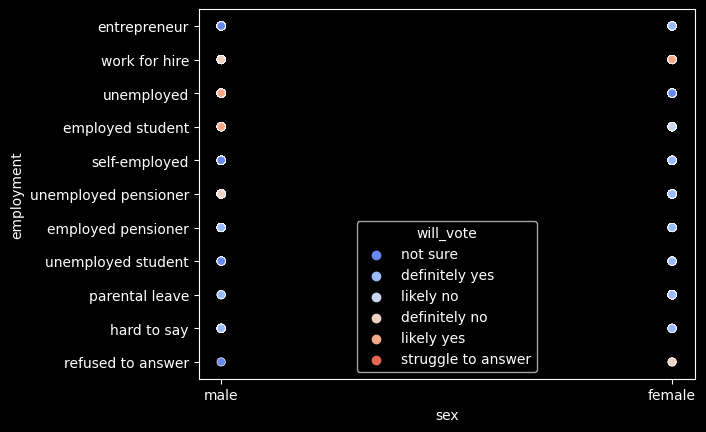

In [86]:
sns.scatterplot(x="sex",y="employment",data=df,hue="will_vote",palette="coolwarm")

<Axes: xlabel='age', ylabel='candidate'>

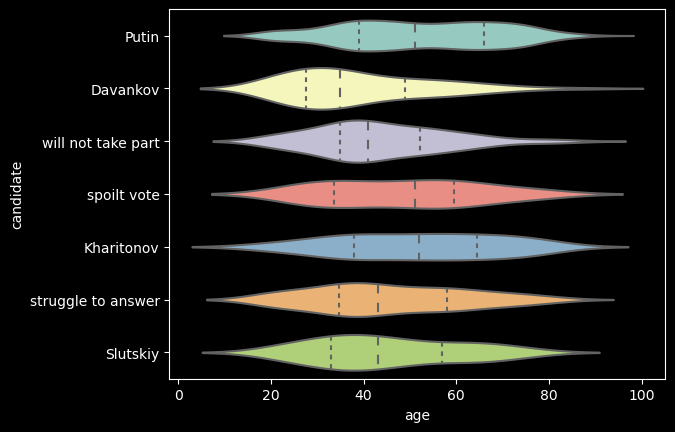

In [88]:
sns.violinplot(x="age",y="candidate",data=df,inner="quartile")

<Axes: xlabel='employment'>

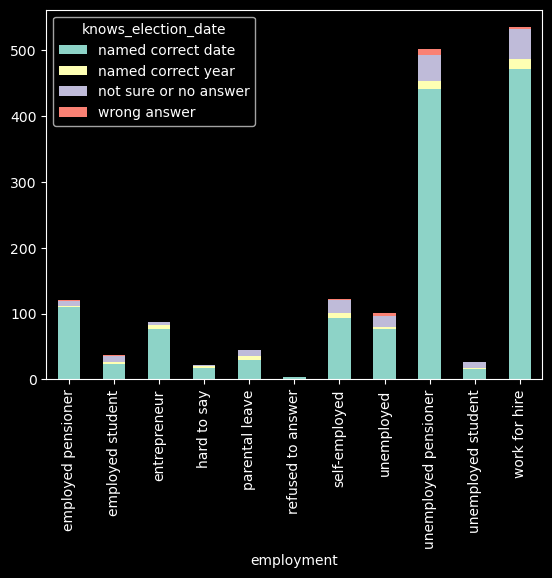

In [89]:
#stacked bar chart
diabetes_hypertension=pd.crosstab(df["employment"],df["knows_election_date"])
diabetes_hypertension.plot(kind="bar",stacked=True)

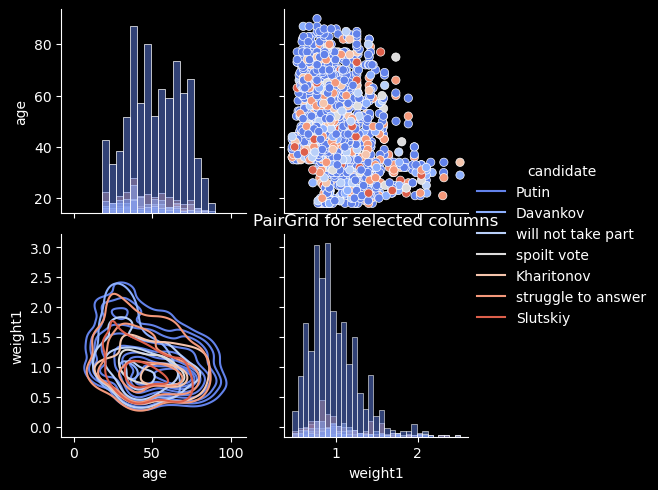

In [93]:
#multivariate analysis

cols = ['age', 'weight1', 'candidate']

g = sns.PairGrid(df[cols], hue='candidate', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

In [96]:
df.corr(numeric_only=True)

,age,weight1
age,1.000000,-0.319715
weight1,-0.319715,1.000000


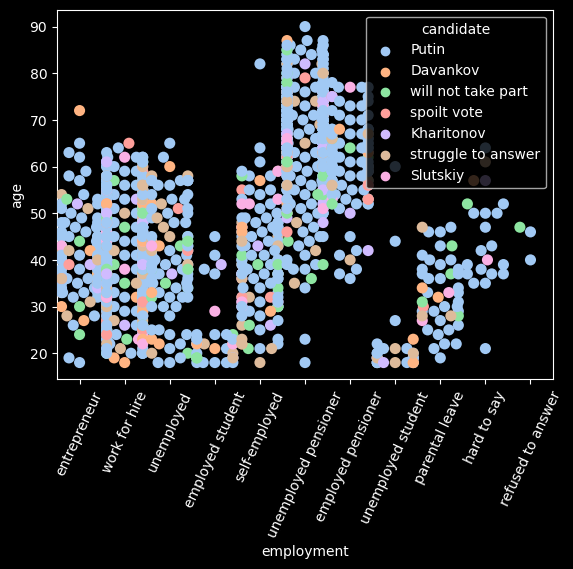

In [99]:
sns.swarmplot(x="employment",y="age",hue="candidate",data=df,palette="pastel",size=8)
plt.xticks(rotation=65)
plt.show()

In [103]:
fig=px.scatter(df,x="age",y="employment",color="candidate",hover_data=["will_vote","sex"],title="Interactive  scatter plot")
fig.show()

In [104]:
fig=px.scatter_3d(df,x="age",y="employment",z="will_vote",color="candidate",hover_data=["sex","education"],title="Interactive 3d  scatter plot")
fig.show()

In [105]:
import plotly.graph_objects as go
data_corr=df.corr(numeric_only=True)
fig=go.Figure(data=go.Heatmap(z=data_corr.values,x=data_corr.columns,y=data_corr.index))
fig.show()

In [154]:
fig = px.scatter_3d(df, x='age', y='sex', z='will_vote', color='knows_election_date',
                    title='3D Scatter plot with Color Gradient')
fig.show()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             692 non-null    object 
 13  company_type         879 non-null    object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), object(13)
memory usage

In [133]:
df[cat_cols].isna().sum()

sex                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
dtype: int64

In [134]:
df[num_cols].isna().sum()

age        0
weight1    0
dtype: int64

In [131]:
cat_cols

['sex',
 'federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment',
 'job_type',
 'company_type']

In [135]:
df.mode()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,female,37.0,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing",0.770806
1,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
mode_values=df.mode().iloc[0]
df[cat_cols]=df[cat_cols].fillna(mode_values)

In [136]:
#encodeing
from sklearn.preprocessing import LabelEncoder

In [140]:
lbe=LabelEncoder()         #it convert object to integer
for col in cat_cols:
    df[col]=lbe.fit_transform(df[col])

In [141]:
df[cat_cols].isna().sum()

sex                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
dtype: int64

In [142]:
df.dtypes

sex                      int64
age                    float64
federal_district         int64
type_of_city             int64
knows_election_date      int64
will_vote                int64
candidate                int64
television_usage         int64
internet_usage           int64
education                int64
income                   int64
employment               int64
job_type                 int64
company_type             int64
weight1                float64
dtype: object

In [143]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,1,18.0,2,6,0,4,2,5,3,3,4,2,6,5,1.445172
1,1,23.0,2,6,0,4,2,2,3,2,4,10,0,18,1.445172
2,1,20.0,7,4,0,1,2,5,3,2,4,10,4,11,1.301691
3,1,22.0,3,0,2,4,0,5,3,2,4,7,6,21,1.538628
4,1,21.0,5,0,0,1,2,0,3,1,4,1,0,17,1.967015


In [145]:
df['candidate'].unique()

array([2, 0, 6, 4, 1, 5, 3], dtype=int64)

In [ ]:
#now you can do anything with data because it conrt in numerica formate. lets see futher plot:

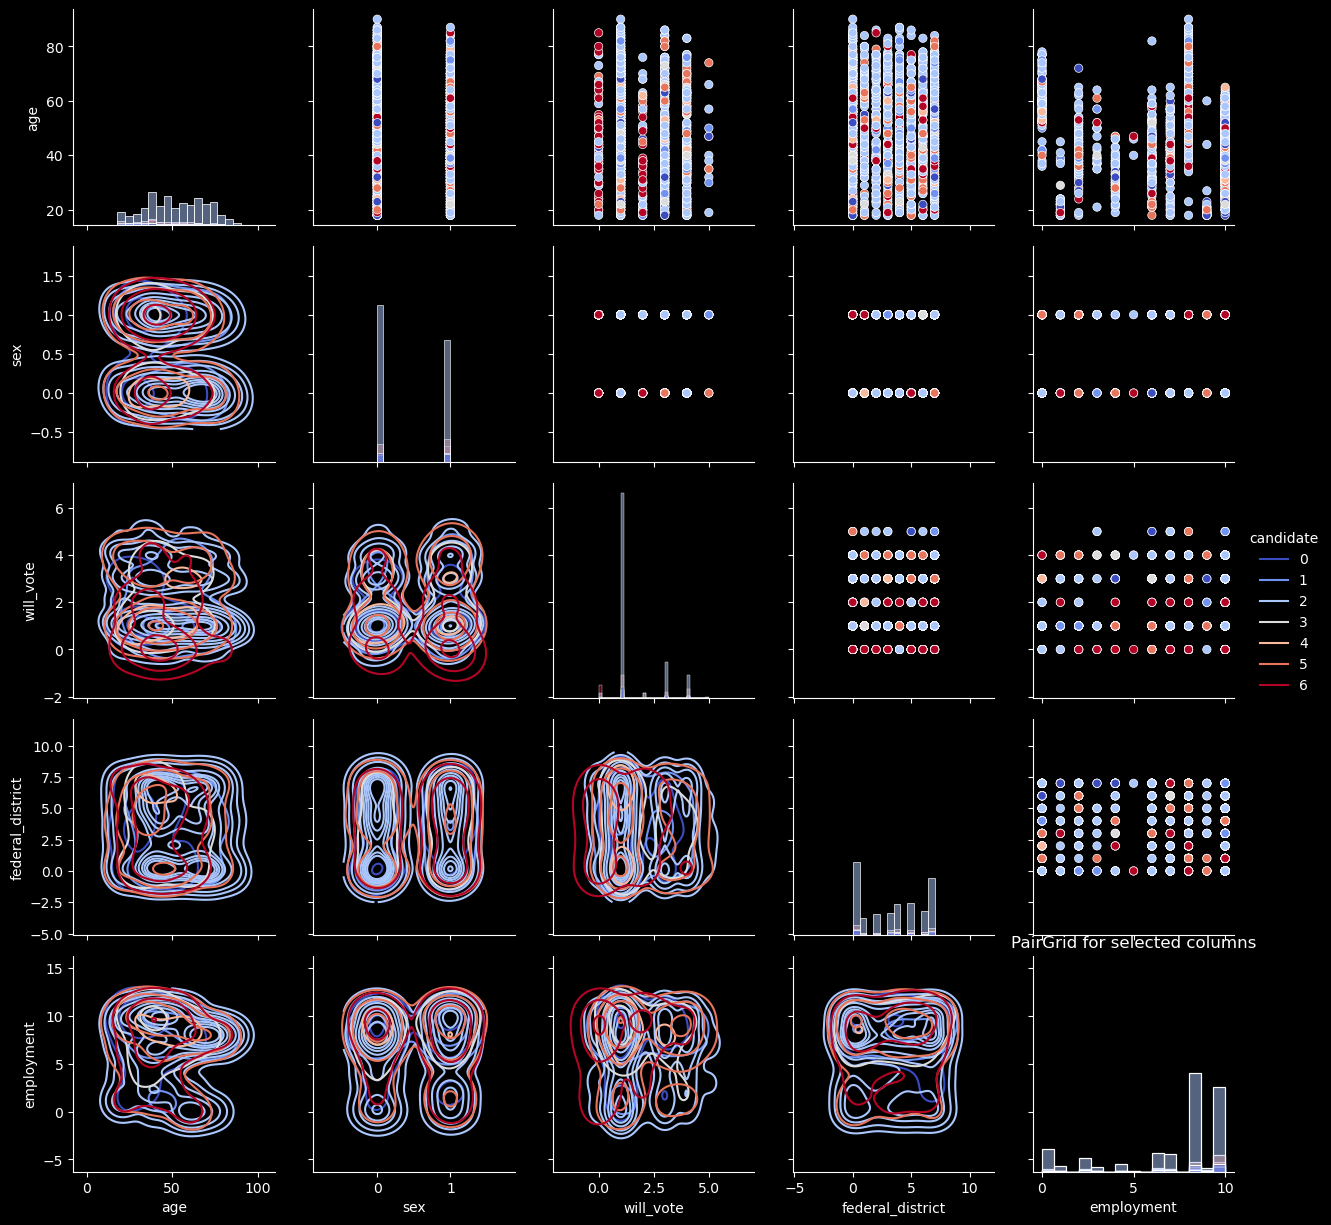

In [146]:
#multivariate analysis

cols = ['age', 'sex', 'will_vote', 'federal_district', 'candidate','employment']

g = sns.PairGrid(df[cols], hue='candidate', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

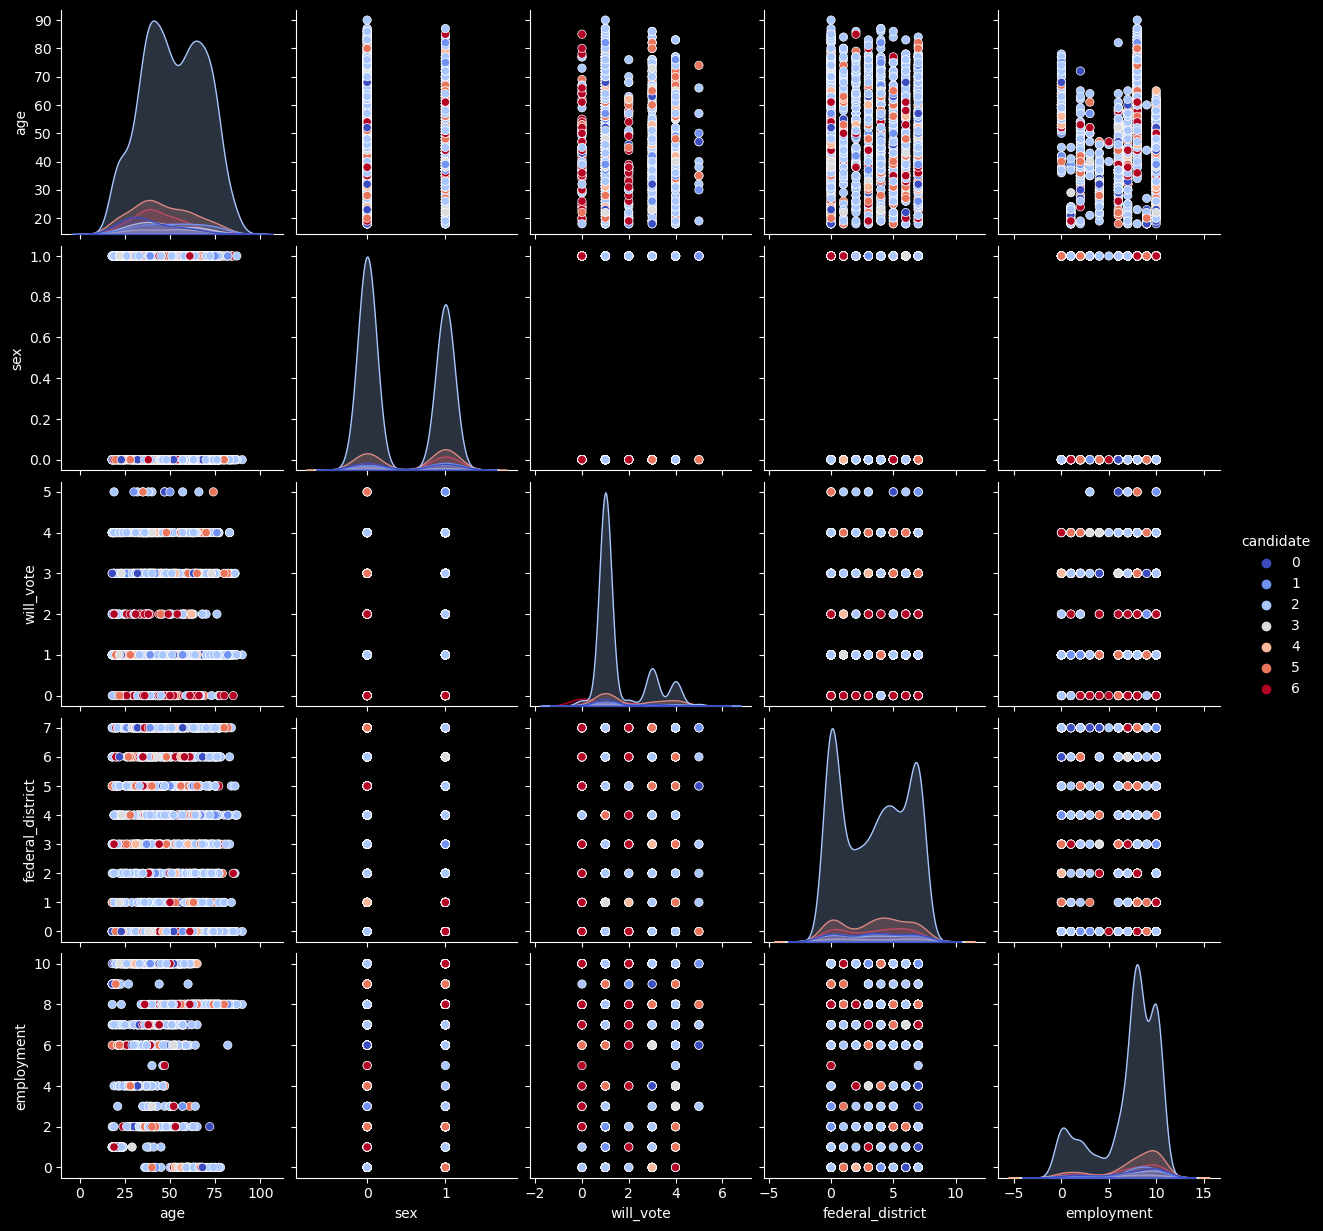

In [148]:
cols = ['age', 'sex', 'will_vote', 'federal_district', 'candidate','employment']

g = sns.pairplot(df[cols], hue='candidate', palette = 'coolwarm')

<Axes: >

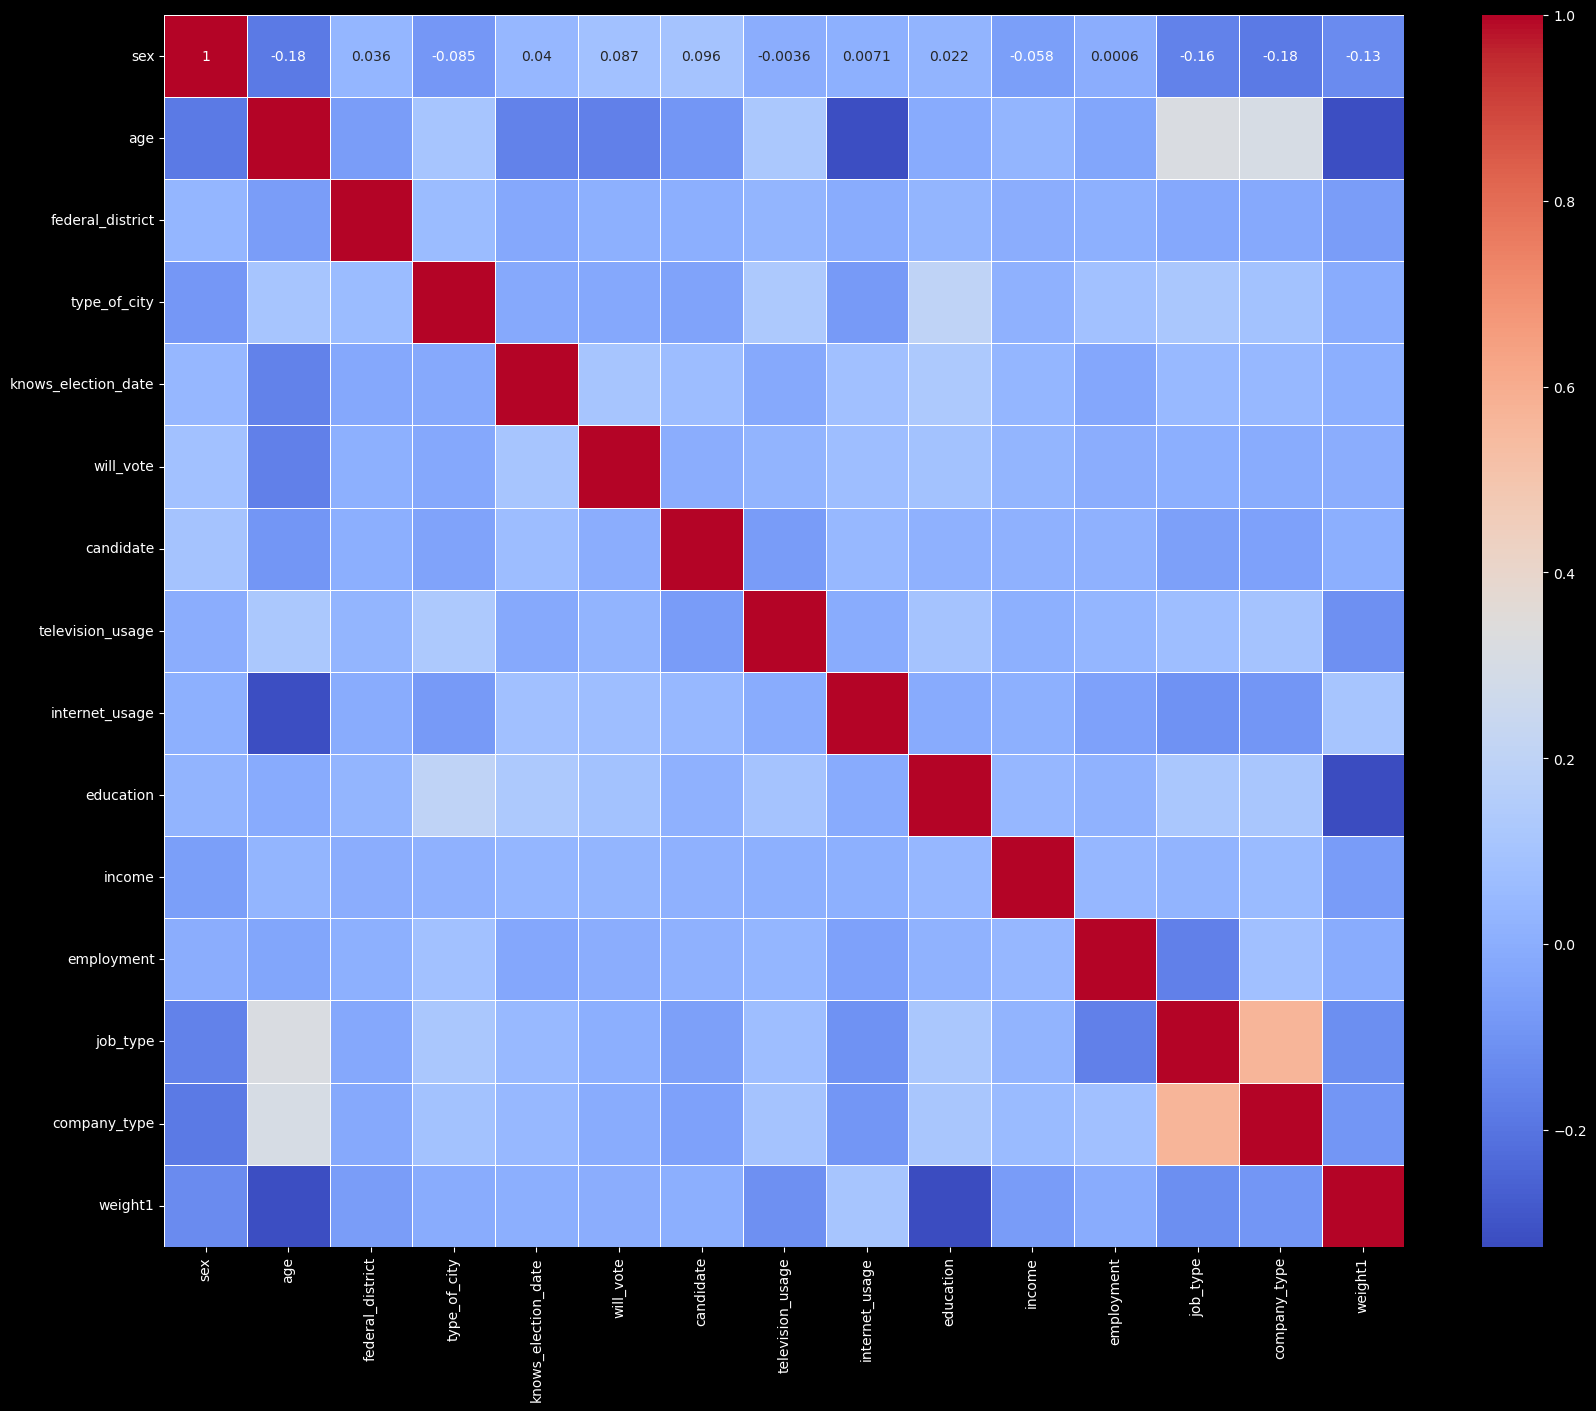

In [149]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True,cmap="coolwarm",linewidth=.5)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   int64  
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   int64  
 3   type_of_city         1600 non-null   int64  
 4   knows_election_date  1600 non-null   int64  
 5   will_vote            1600 non-null   int64  
 6   candidate            1600 non-null   int64  
 7   television_usage     1600 non-null   int64  
 8   internet_usage       1600 non-null   int64  
 9   education            1600 non-null   int64  
 10  income               1600 non-null   int64  
 11  employment           1600 non-null   int64  
 12  job_type             1600 non-null   int64  
 13  company_type         1600 non-null   int64  
 14  weight1              1600 non-null   float64
dtypes: float64(2), int64(13)
memory usage: